In [1]:
# Imports
import pandas as pd
import sklearn
import sklearn.model_selection
import os
import numpy as np

In [2]:
# book crossing dataset
books = pd.read_csv(os.path.join("data", "book-crossing", "books.csv"), sep = ";", error_bad_lines = False, encoding = "latin-1")
books.drop(["Publisher", "Image-URL-S", "Image-URL-M", "Image-URL-L"], axis = 1)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\users\juand\appdata\local\programs\python\python36\lib\site-packages\IP

,ISBN,Book-Title,Book-Author,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004
271358,0192126040,Republic (World's Classics),Plato,1996


In [3]:
# book crossing dataset
ratings = pd.read_csv(os.path.join("data", "book-crossing", "ratings.csv"), sep = ";",encoding = "latin-1")
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
# book crossing dataset
users = pd.read_csv(os.path.join("data", "book-crossing", "users.csv"), sep = ";",encoding = "latin-1")
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
# goodbooks dataset
books = pd.read_csv(os.path.join("data", "goodbooks", "books.csv"))
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [6]:
# goodbooks dataset
ratings = pd.read_csv(os.path.join("data", "goodbooks", "ratings.csv"))
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [7]:
# goodbooks dataset
to_read = pd.read_csv(os.path.join("data", "goodbooks", "to_read.csv"))
to_read

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


In [8]:
# We are going to use the goodbooks dataset because it has more ratings
# Goal: given a user and a book -> predict the user's rating of that book.

In [9]:
books[books.original_title=="The Complete Calvin and Hobbes"]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,...,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...


In [10]:
book_id = 3221
print(books[books.book_id==book_id]["original_title"].values)
ratings[ratings.book_id==book_id]

['Savvy']


,user_id,book_id,rating
210763,5453,3221,4
292003,6324,3221,3
326978,6239,3221,3
348024,7569,3221,4
348760,4356,3221,4
...,...,...,...
5692250,35506,3221,5
5696161,7486,3221,5
5740909,29780,3221,4
5860961,30766,3221,4


In [11]:
# Encode the users
userEncoder = sklearn.preprocessing.LabelEncoder()
ratings['user_id'] = userEncoder.fit_transform(ratings['user_id'].values)
# Encode the books
bookEncoder = sklearn.preprocessing.LabelEncoder()
ratings['book_id'] = bookEncoder.fit_transform(ratings['book_id'].values)
# Convert ratings to float
ratings['rating'] = ratings['rating'].values.astype(np.float32)

In [12]:
# Exploring how much data we have
userSize = ratings['user_id'].nunique()
bookSize = ratings['book_id'].nunique()
minRating = min(ratings['rating'])
maxRating = max(ratings['rating'])

print(("Number of unique users: {}\n" +
      "Number of unique books: {}\n" +
      "Minimum rating: {}\n" +
      "Maximum rating: {}\n").format(userSize, bookSize, minRating, maxRating))


Number of unique users: 53424
Number of unique books: 10000
Minimum rating: 1.0
Maximum rating: 5.0



In [13]:
# Split into features and labels
features = ratings[['user_id', 'book_id']].values
labels = ratings['rating'].values

In [14]:
# Split into train and test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(features, labels, 
                                                                            test_size = 0.10, 
                                                                            random_state = 420) 

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5378831, 2)
(597648, 2)
(5378831,)
(597648,)


In [16]:
print(x_train)
print(y_train)

[[ 5947    16]
 [ 7288   522]
 [24223  1773]
 ...
 [24215    93]
 [40225    85]
 [ 4852   225]]
[4. 4. 4. ... 3. 3. 4.]


In [17]:
# Size of the output of the embedding layer
outputSize = 5

In [18]:
# Reshape data to fit the network
x_train = [x_train[:,0],x_train[:,1]]
x_test = [x_test[:,0],x_test[:,1]]

In [19]:
x_train

[array([ 5947,  7288, 24223, ..., 24215, 40225,  4852], dtype=int64),
 array([  16,  522, 1773, ...,   93,   85,  225], dtype=int64)]

In [20]:
y_train

array([4., 4., 4., ..., 3., 3., 4.], dtype=float32)

In [32]:
# Keras imports
from tensorflow import keras
from keras.layers.embeddings import Embedding
from keras.layers import Input, Reshape, Concatenate, Dropout, Dense, Lambda, Reshape, Dot
from keras.optimizers import Adam
from keras.models import Model

In [33]:
# Input Layers

userInput = Input(shape=(1,))
userEmbedding = Embedding(userSize, outputSize) (userInput)
userEmbedding = Reshape((outputSize,)) (userEmbedding)

bookInput = Input(shape=(1,))
bookEmbedding = Embedding(bookSize, outputSize) (bookInput)
bookEmbedding = Reshape((outputSize,)) (bookEmbedding)

In [34]:
# Output Layers

dotLayer = Dot(axes=1) ([userEmbedding, bookEmbedding])

#dropoutLayer1 = Dropout(0.5) (dotLayer)

denseLayer1 = Dense(20, activation = 'relu') (dotLayer)

dropoutLayer2 = Dropout(0.20) (denseLayer1)

denseLayer2 = Dense(20, activation = 'relu') (dropoutLayer2)

dropoutLayer3 = Dropout(0.20) (denseLayer2)

outputLayer = Dense(1, activation = 'sigmoid') (dropoutLayer3)

adjOutput = Lambda(lambda rating : rating * (5 - 1) + 1) (outputLayer)


In [35]:
# Define the model

model = Model (inputs = [userInput, bookInput], outputs = adjOutput)
opt = Adam (lr=0.001)
model.compile(loss='mean_squared_error', optimizer = opt, metrics = ['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 5)         267120      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 1, 5)         50000       input_6[0][0]                    
____________________________________________________________________________________________

In [36]:
# Train the model

history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1,
                    validation_data = (x_test, y_test))

c:\users\juand\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5378831 samples, validate on 597648 samples
Epoch 1/20
5378831/5378831 [==============================] - 450s 84us/step - loss: 0.9024 - accuracy: 0.3846 - val_loss: 0.8554 - val_accuracy: 0.4034
Epoch 2/20
5378831/5378831 [==============================] - 445s 83us/step - loss: 0.8265 - accuracy: 0.4236 - val_loss: 0.8159 - val_accuracy: 0.4281
Epoch 3/20
5378831/5378831 [==============================] - 443s 82us/step - loss: 0.7850 - accuracy: 0.4466 - val_loss: 0.7979 - val_accuracy: 0.4338
Epoch 4/20
5378831/5378831 [==============================] - 443s 82us/step - loss: 0.7586 - accuracy: 0.4639 - val_loss: 0.7857 - val_accuracy: 0.4400
Epoch 5/20
5378831/5378831 [==============================] - 443s 82us/step - loss: 0.7416 - accuracy: 0.4744 - val_loss: 0.7784 - val_accuracy: 0.4433
Epoch 6/20
5378831/5378831 [==============================] - 443s 82us/step - loss: 0.7291 - accuracy: 0.4821 - val_loss: 0.7699 - val_accuracy: 0.4546
Epoch 7/20
5378831/5378831 [=

In [37]:
# Save the trained model
model.save(os.path.join("models", "5_out_dot_2_dense_20_epochs_batch_dropout_0.2_accuracy_0.465"))

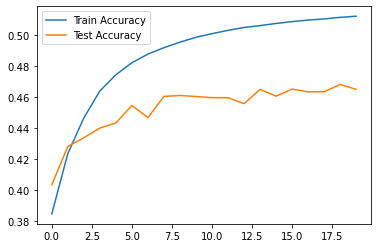

In [38]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label = "Train Accuracy")
plt.plot(val_accuracy, label = "Test Accuracy")
plt.legend()
plt.show()

In [ ]:
# Making recommendations for user 0
def recommend (userId, model):
    model = keras.models.load_model(os.path.join("models", model))
    encodedUser = userEncoder.transform([userId])[0]
    allBooks = np.array(list(set(ratings["book_id"].values)))
    user = np.array([encodedUser]*len(allBooks))
    predictions = model.predict([user, allBooks])
    predictions = np.array([p[0] for p in predictions])
    print(predictions)
recommend (1, "model_2")

In [39]:
model = keras.models.load_model(os.path.join("models", "5_out_dot_2_dense_20_epochs_batch_dropout_0.2_accuracy_0.465"))

In [52]:
user_id = 5
encodedUser = userEncoder.transform([user_id])[0]
print(encodedUser)
allBooks = np.array(list(set(ratings["book_id"].values)))
user = np.array([encodedUser]*len(allBooks))
predictions = model.predict([user, allBooks])
print(predictions)
predictions = np.array([p[0] for p in predictions])
top5ratings = (-predictions).argsort()[:10]
top5books = allBooks[top5ratings]
top5booksDecoded = bookEncoder.inverse_transform(top5books)
print(predictions[top5ratings])

4
[[4.227414 ]
 [4.5758724]
 [3.3084087]
 ...
 [3.9363208]
 [4.0500293]
 [4.130975 ]]
[4.9950356 4.9899645 4.9882526 4.987028  4.985483  4.979892  4.974061
 4.9717255 4.971698  4.9708548]


In [53]:
for book_id in top5booksDecoded:
    print(books[books.book_id == book_id]["original_title"].values)
    

['Homicidal Psycho Jungle Cat: A Calvin and Hobbes Collection']
["There's Treasure Everywhere: A Calvin and Hobbes Collection"]
['Standing for Something: 10 Neglected Virtues That Will Heal Our Hearts and Homes']
['A Song of Ice and Fire']
['Hark! A Vagrant']
['Cuentos completos']
['Head Games ']
['A Storm of Swords: Part 2 Blood and Gold']
['The Indispensable Calvin and Hobbes: A Calvin and Hobbes Treasury']
['A Storm of Swords: Part 1 Steel and Snow']


In [54]:
read = ratings[ratings.user_id==user_id][["book_id","rating"]].values
for book_id,rating in read:
    print(books[books.book_id == book_id]["original_title"].values,rating)

['Peter and the Secret of Rundoon'] 4.0
['Pretties'] 4.0
['The King'] 5.0
[nan] 5.0
['Nine Stories'] 4.0
['A Game of Thrones'] 5.0
['The Hero of Ages'] 4.0
['Change of Heart'] 4.0
['Guards! Guards!'] 3.0
['The Secret History'] 4.0
['Boy: Tales of Childhood'] 4.0
['Queen of Shadows'] 5.0
['The Prophet'] 5.0
['The BFG'] 5.0
['One for the Money'] 2.0
['What Alice Forgot'] 1.0
['The Mother Tongue: English and How It Got That Way'] 5.0
['The Art of Racing in the Rain'] 3.0
['3rd Degree'] 5.0
['Nevermore'] 5.0
['The Secret Garden'] 5.0
['Born in Fire '] 4.0
['Fifty Shades Darker'] 5.0
['How to Love'] 3.0
['The Summer Before the War'] 5.0
["Charlotte's Web"] 3.0
['The Three Pigs'] 4.0
['Night of the Soul Stealer'] 5.0
['Girls Night In'] 5.0
['King & Maxwell'] 5.0
["My Sister's Keeper"] 5.0
['1776'] 5.0
['Beauty: A Retelling of the Story of Beauty and the Beast'] 5.0
['A Great and Terrible Beauty'] 4.0
['The Lord of the Rings'] 4.0
['Firelight (Firelight, #1)'] 5.0
['The Silent Wife'] 4.0
['Th